## PCA and Senate Voting Data
### Places where you have to write code are marked with #TODO

In this problem we are given, $X$ the $m \times n$ data matrix with entries in $\{-1,0,1\}$, where each row corresponds to a Senator, and each column to a bill.

In [1]:
# Import the necessary packages for data manipulation, computation and PCA 
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

np.random.seed(7)

In [2]:
senator_df =  pd.read_csv('senator_data_pca/data_matrix.csv')
affiliation_file = open("senator_data_pca/politician_labels.txt", "r")
affiliations = [line.split('\n')[0].split(' ')[1] for line in affiliation_file.readlines()]
X = np.array(senator_df.values[:, 3:].T, dtype='float64') #transpose to get senators as rows
print("X.shape: ", X.shape)
n = X.shape[0] #Number of senators
m = X.shape[1] #Number of bills

X.shape:  (100, 542)


##### We see that the number of rows $n$, is the number of senators and is equal to 100. The number of columns, $m$ is the number of bills and is equal to 542. 

In [3]:
typical_row = X[0,:]
print(typical_row.shape)
print(typical_row)

(542,)
[ 1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1.
 -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.
 -1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  0. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.
  1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  0.  0.  1.  1. -1.  1.
  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  0. -1. -1.  1.  1. -1.
  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.
 -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1. -1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  0.  1.  0. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.

##### A typical row of $X$ consists of entries -1 (senator voted against), 1(senator voted for) and 0(senator abstained) for each bill. 

In [4]:
typical_column = X[:,0]
print(typical_column.shape)
print(typical_column)

(100,)
[ 1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1.
 -1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1.
  1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1. -1.]


##### A typical row of $X$ consists of entries in \{-1, 0, 1\} based on how each senator voted for that particular bill.

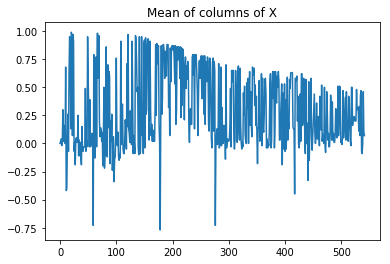

In [5]:
X_mean = np.mean(X, axis = 0)
plt.plot(X_mean)
plt.title('Mean of columns of X')
plt.show()

##### We see that the mean of the columns is not zero so we center the data by subtracting the mean

In [6]:
X_original = X.copy()
X = X - np.mean(X, axis = 0)

### Part a) Finding a  unit-norm $m$-vector $a$ to maximize variance

##### This is a function to calculate the scores, $f(X,a)$.

In [7]:
def f(X, a):
    return np.matmul(X,a)

##### Before we calculate the $a$ that maximizes variance, let us observe how the scalar projections on a random direction $a$ look like.

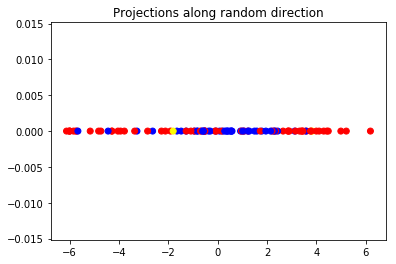

Variance along random direction:  9.26745439089334


In [8]:
a_rand = np.random.rand(542,1) #generate a random direction
a_rand = a_rand/np.linalg.norm(a_rand) #we normalize the vector
scores_rand = f(X, a_rand) #recall definition of f above
# Now we visualize the scores along a_rand
plt.scatter(scores_rand, np.zeros_like(scores_rand), c=affiliations)
plt.title('Projections along random direction')
plt.show()

print("Variance along random direction: ", scores_rand.var())

##### Note here that projecting along the random vector $a\_{rand}$ does not explain much variance at all! It is clear that this direction does not give us any information about the senators' affiliations.

#### Next let us find direction a_1 that maximizes variance. This will be the first principal component of X.

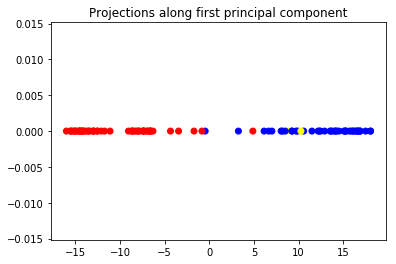

Variance along first principal component:  149.74896507620747


In [14]:
#TODO: write code to get a_1, the first principal component of X(Note that shape of a_1 must be (542, 1)) 
pca = PCA(n_components=1)
pca.fit(X)
a_1 = pca.components_.reshape(-1,) #TODO replace this line with code to get a_1 that maximizes variance
#Hint: the PCA packagle imported from sklearn.decomposition will be useful here. Look up the function
#pca.fit() from its documentation


#Next we compute scores along first principal component
scores_a_1 = f(X, a_1) #recall definition of f above
plt.scatter(scores_a_1, np.zeros_like(scores_a_1), c=affiliations)
plt.title('Projections along first principal component')
plt.show()

print("Variance along first principal component: ", scores_a_1.var())

##### We can see that majority of the blue is close to one side of the axis and red is close to the other side. This shows that the first principal component direction explains the vote spread tends to align with party affiliation. 

### Part b) Comparison to party averages
##### Building on the observation that senators vote in line with their party average let us compute variance along the following two directions:
a_mean_red: Unit vector along mean of rows corresponding to RED senators    
a_mean_blue: Unit vector along mean of rows corresponding to BLUE senators

(542,)


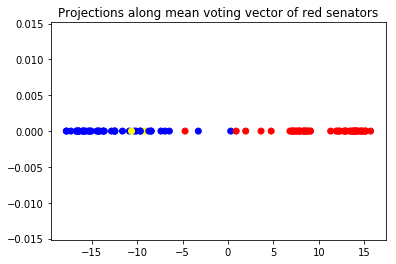

Variance along mean voting vector of red senators:  148.80699963205723
Dot product of a_mean_red and a_1: -0.9965356912812978
Angle between a_mean_red and a_1 in degrees: 175.22941782780276


In [15]:
aff = np.array(affiliations)
mu_red = X[aff == 'Red', :].mean(axis=0) #TODO Replace this line with mu_red (with shape (542,1)),the mean of rows of X
#corresponding to Red senators as given by affiliations. 
#Hint: Print out affiliations and check what its entries are:
# print(len(affiliations))
# print(affiliations)

print(mu_red.shape)
a_mean_red = mu_red/np.linalg.norm(mu_red) # normalize the vector 
scores_mean_red = f( X, a_mean_red)
plt.scatter(scores_mean_red, np.zeros_like(scores_mean_red), c=affiliations)
plt.title('Projections along mean voting vector of red senators')
plt.show()

print("Variance along mean voting vector of red senators: ", scores_mean_red.var())

#Let us check angle between this and the first prinicpal component
dot_product_red_a1 = float(np.dot(a_mean_red.T, a_1))
angle_red_a1 = np.arccos(dot_product_red_a1)*180/np.pi

print("Dot product of a_mean_red and a_1:", dot_product_red_a1)
print("Angle between a_mean_red and a_1 in degrees:", angle_red_a1)

(542,)


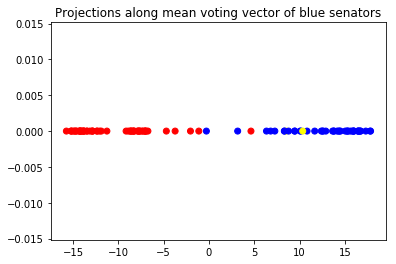

Variance along mean voting vector of blue senators:  148.9088414400461
Dot product of a_mean_blue and a_1: 0.9969831227823032
Angle between a_mean_blue and a_1 in degrees: 4.4516979833736166


In [16]:
mu_blue = X[aff == 'Blue'].mean(axis=0) #TODO Replace this line with mu_red (with shape (542,1)),the mean of rows of X 
#corresponding to Blue senators as given by affiliations. 
#Hint: Print out affiliations and check what its entries are:
# print(len(affiliations))
# print(affiliations)

print(mu_blue.shape)

a_mean_blue = mu_blue/np.linalg.norm(mu_blue) # normalize the vector 
scores_mean_blue = f( X, a_mean_blue)
plt.scatter(scores_mean_blue, np.zeros_like(scores_mean_blue), c=affiliations)
plt.title('Projections along mean voting vector of blue senators')
plt.show()

print("Variance along mean voting vector of blue senators: ", scores_mean_blue.var())

#Let us check angle between this and the first prinicpal component
dot_product_blue_a1 = float(np.dot(a_mean_blue.T, a_1))
angle_blue_a1 = np.arccos(dot_product_blue_a1)*180/np.pi

print("Dot product of a_mean_blue and a_1:", dot_product_blue_a1)
print("Angle between a_mean_blue and a_1 in degrees:", angle_blue_a1)


In [17]:
#Finally let us compute angle between a_mean_red and a_mean_blue:
dot_product_blue_red = float(np.dot(a_mean_blue.T, a_mean_red))
angle_blue_red = np.arccos(dot_product_blue_red)*180/np.pi

print("Dot product of a_mean_blue and mean_red:", dot_product_blue_red)
print("Angle between a_mean_blue and mean_red in degrees:", angle_blue_red)


Dot product of a_mean_blue and mean_red: -0.9992350984093117
Angle between a_mean_blue and mean_red in degrees: 177.75886458298191


### #TODO Fill in code to obtain mu_red, and mu_blue in the cells above. Comment on your observations about how the party averages (a_mean_red and a_mean_blue) are related to the first principal component (a_1).


We can see that the red and blue are in the opposite side of votes. The blue votes are negative while the reds are positive. 

### Part c) Computing total variance. Fill in code in cell below to obtain total variance along first two principal components. (Refer to the latex file for more details on the question).

In [22]:
X_bar = np.matmul(X.T, X)/n

total_variance = PCA(n_components=2).fit(X_bar).explained_variance_.sum() #Replace with correct answer, the sum of largest two eigenvalues lambda_1, lambda_2 of X_bar

print("Total variance explained by first two principal components: ", total_variance)


Total variance explained by first two principal components:  42.02789225730074


#### Next we find the projection onto the plane spanned by the first two principal components

(100, 2)


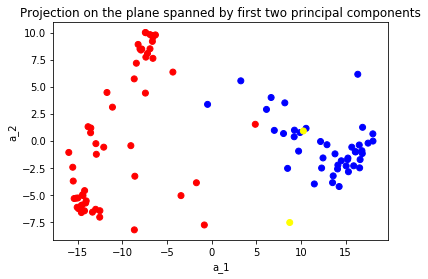

In [23]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X)

print(projected.shape)
plt.scatter(projected[:, 0], projected[:, 1], c=affiliations)
plt.xlabel('a_1')
plt.ylabel('a_2')
plt.title('Projection on the plane spanned by first two principal components')
plt.show()

##  Part d) Finding bills that are the most/least contentious

### Approach 1: Finding variance of columns of X. Note that the variance of column $j$ can be viewed as the variance of scores along the direction $e_j$, where $e_j$ is a basis vector with one in the $j$th entry and zero elsewhere. 

In [24]:
list_variances = X.var(0) # projects the standard basis in R^n for all bills; returns variances of each column
bills = senator_df['bill_type bill_name bill_ID'].values

sorted_idx_variances = list_variances.argsort()[::-1] #TODO remove this line and replace it with code to 
#compute sorted_idx_variances: a np.array of shape (542,) containing integer entries that are indices
# corresponding to decreasing order of variance of scores in list_variances. Hint: Use np.argsort()
#Eg. If list_variances = [1,3,2,4], then sorted_idx_variances should be np.array([3,1,2,0])



print(sorted_idx_variances.shape)



(542,)


### #TODO: Part d i) Fill in code to compute sorted_idx_variances in the cell above

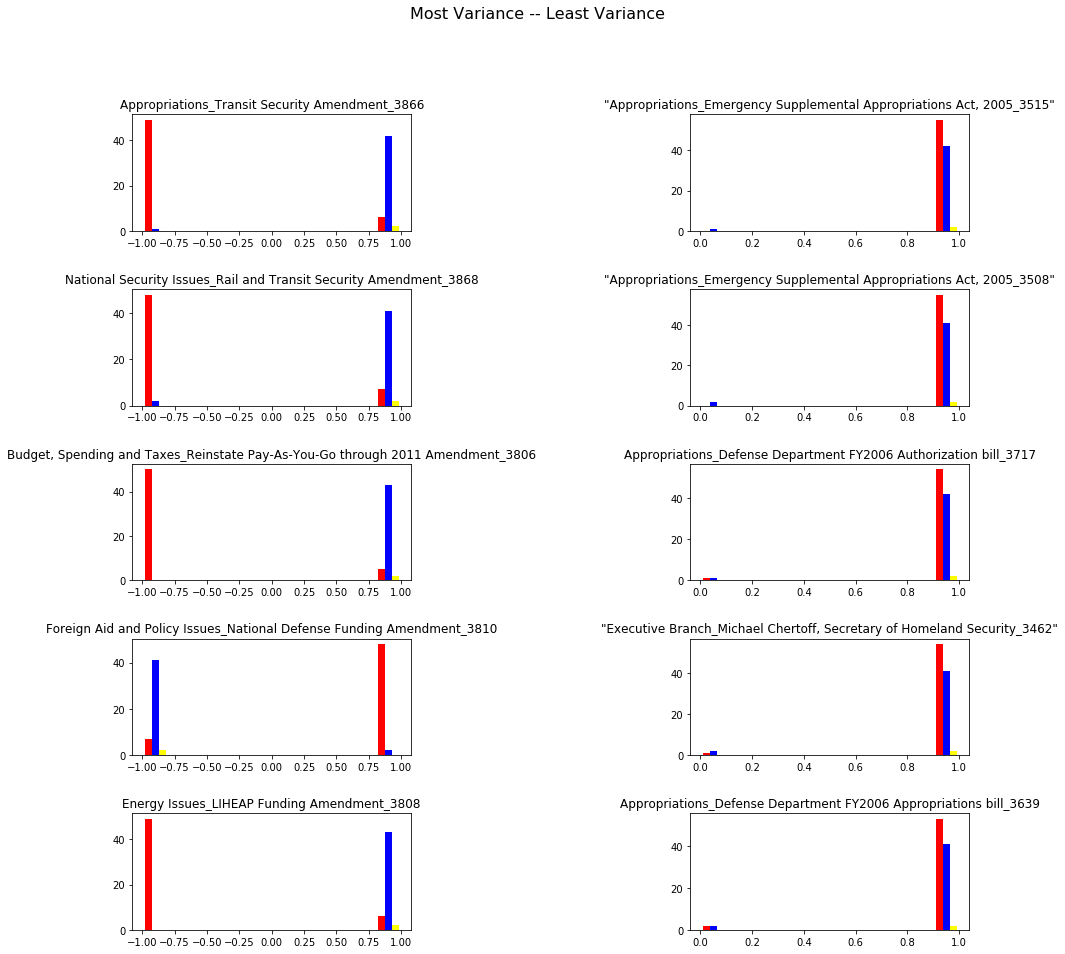

In [25]:
# Retrive the bills with the top 5 variances and the lowest 5 variances
top_5 = [bills[sorted_idx_variances[i]] for i in range(5)]
# print(top_10)
bot_5 = [bills[sorted_idx_variances[-1-i]] for i in range(5)]

# print(bot_10)
#We look at voting pattern for bills with most and least variance using original non-centered X matrix
fig, axes = plt.subplots(5,2, figsize=(15,15)) # 1 plot to make things easier to see
for i in range(5): 
    idx = sorted_idx_variances[i]

    X_red_c = X_original[np.array(affiliations) == 'Red',idx]
    X_blue_c = X_original[np.array(affiliations) == 'Blue',idx]
    X_yellow_c = X_original[np.array(affiliations) == 'Yellow',idx]
    
    axes[i,0].hist([X_red_c, X_blue_c, X_yellow_c], color = ['red', 'blue', 'yellow'])
    axes[i,0].set_title(bills[idx])


for i in range(1,6): 
    idx2 = sorted_idx_variances[-i]
    X_red_c2 = X_original[np.array(affiliations) == 'Red',idx2]
    X_blue_c2 = X_original[np.array(affiliations) == 'Blue',idx2]
    X_yellow_c2 = X_original[np.array(affiliations) == 'Yellow',idx2]
    
    axes[i-1,1].hist([X_red_c2, X_blue_c2, X_yellow_c2], color = ['red', 'blue', 'yellow'])
    axes[i-1,1].set_title(bills[idx2])

plt.subplots_adjust(hspace=0.5, wspace = 1)    
fig.suptitle('Most Variance -- Least Variance', fontsize=16)
plt.show()


### #TODO Part d ii) Comment on how the voting looks like for bills with most variance and bills with least variance


Bills with most variance shows that 4 out of 5 bills are supported by Red while only one is supported by Blue. Among them there is no bill that both are sided together. However, with bills with the least variance, they are all supported together by Red and Blue.

### Approach 2: We find the projection of the basis vector corresponding to each bill on to the first principal components and choose those bills with highest absolute value of projections. Note that this is equivalent to choosing bills based on highest absolute values of a_1.

(542,)


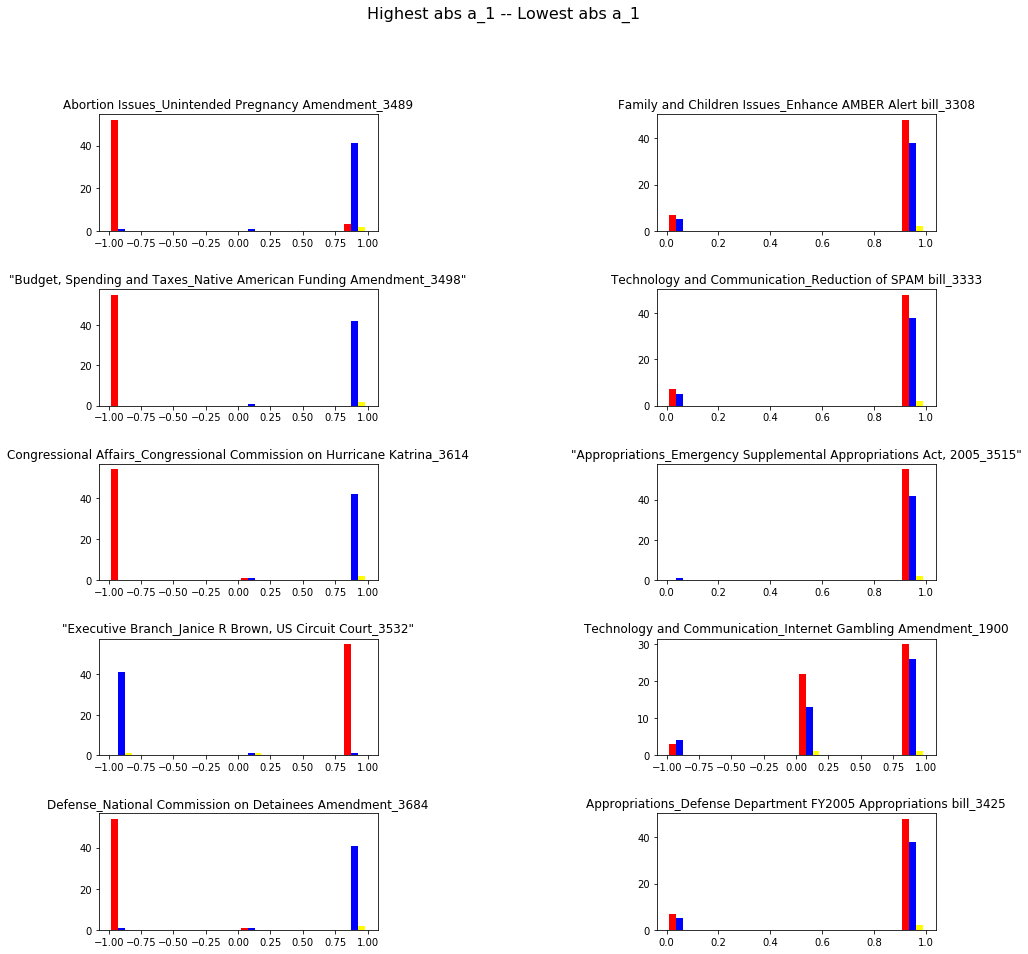

In [26]:
# Recall that a_1_scores holds the projection onto the first principal component
a_1_flat = np.ndarray.flatten(a_1) # first, flatten the a_1 of len 542
abs_a_1 = np.abs(a_1_flat)

sorted_idxes = np.argsort(-abs_a_1) #in decreasing order
print(sorted_idxes.shape)

top_5_a1 = [bills[sorted_idxes[i]] for i in range(5)]
bot_5_a1 = [bills[sorted_idxes[-1-i]] for i in range(5)]


fig, axes = plt.subplots(5,2, figsize=(15,15)) # 1 plot to make things easier to see

for i in range(5): 
    idx = sorted_idxes[i]

    X_red_c = X_original[np.array(affiliations) == 'Red',idx]
    X_blue_c = X_original[np.array(affiliations) == 'Blue',idx]
    X_yellow_c = X_original[np.array(affiliations) == 'Yellow',idx]
    
    axes[i,0].hist([X_red_c, X_blue_c, X_yellow_c], color = ['red', 'blue', 'yellow'])
    axes[i,0].set_title(bills[idx])


for i in range(1,6): 
    idx2 = sorted_idxes[-i]
    
    X_red_c2 = X_original[np.array(affiliations) == 'Red',idx2]
    X_blue_c2 = X_original[np.array(affiliations) == 'Blue',idx2]
    X_yellow_c2 = X_original[np.array(affiliations) == 'Yellow',idx2]
    
    axes[i-1,1].hist([X_red_c2, X_blue_c2, X_yellow_c2], color = ['red', 'blue', 'yellow'])
    axes[i-1,1].set_title(bills[idx2])

plt.subplots_adjust(hspace=0.5, wspace = 1)    
fig.suptitle('Highest abs a_1 -- Lowest abs a_1', fontsize=16)
plt.show()


### #TODO Part d iii) Comment on how the voting looks like for bills with highest and lowest absolute values of a_1.



Bills with the highest divide Red and Blue with no overlaps while with the least absolute values, they are all alost equally overlapped and supported together by Red and Blue, just like the bills with the least variance.

#### Next let us compare the bills found by the two approaches

In [27]:
# The bills that are the same in both the top and bottom 10 using these different methods:
print('Number of common bills in top:', len(np.intersect1d(top_5 ,top_5_a1)))
print('Number of common bills in bottom :', len(np.intersect1d(bot_5 ,bot_5_a1)))


Number of common bills in top: 0
Number of common bills in bottom : 1


### #TODO Part d iv) Are the bills in the two approaches the same?  What do you think is the reason for the difference?
 

No, they are not the same because they are not projected in the same line.

### Part e) Finally, we will look at the scores for senators along the first principal direction and make the following classifications for senators:
a) Senators with the top 10 most positive scores and top 10 most negative scores are classified as most "extreme''.
b) Senators with the 20 scores closest to 0 are classified as least "extreme".

#### Most extreme senators

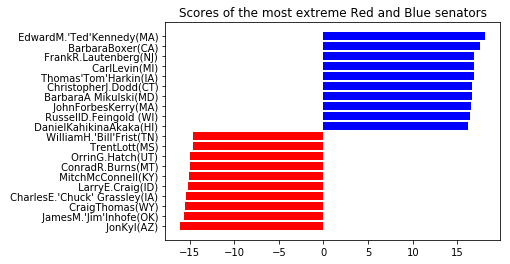

In [35]:
senators = senator_df.columns.values[3:]

senator_scores = f(X,a_1)
complete_sort_indices = np.argsort(senator_scores)

sort_indices = np.hstack([complete_sort_indices[:10], complete_sort_indices[-11:-1]])
senators_sorted = senators[sort_indices]
senator_scores_sorted = senator_scores[sort_indices]
affiliations = np.array(affiliations)
affiliations_sorted = affiliations[sort_indices]

plt.barh(y = senators_sorted, width = senator_scores_sorted, color = affiliations_sorted)
plt.title('Scores of the most extreme Red and Blue senators')
plt.show()


#### Least extreme senators

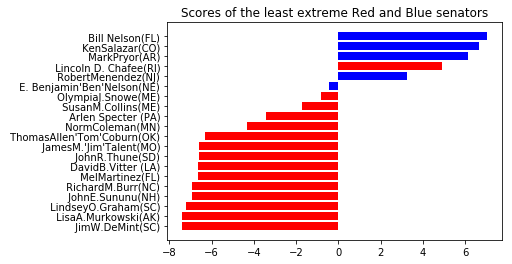

In [37]:
senator_scores = f(X,a_1)
# print(np.sort(np.abs(senator_scores)))
complete_sort_indices = np.argsort(np.abs(senator_scores))[:20]

senator_scores_le= senator_scores[complete_sort_indices]
senators_le = senators[complete_sort_indices]
affiliations = np.array(affiliations)
affiliations_le = affiliations[complete_sort_indices]
sort_indices = np.argsort(senator_scores_le)
senators_sorted = senators_le[sort_indices]
senator_scores_sorted = senator_scores_le[sort_indices]
affiliations_sorted = affiliations_le[sort_indices]

plt.barh(y = senators_sorted, width = senator_scores_sorted, color = affiliations_sorted)
plt.title('Scores of the least extreme Red and Blue senators')
plt.show()

### #TODO Comment on the sign of scores vs party affiliations. 



We can see that Red senators have more negative sign of scores than the blues. Even the red senators with the least extreme show more negative scores than the blue senators and there are more red senators with the least extreme scores. 